**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

This is to 

In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
for (x in dir(fdiry)){cat(x, "\n")}

annotation_ccre 
annotation_chipseq_histone 
annotation_chipseq_tf 
annotation_chipseq_tf_subset 
annotation_chromHMM 
annotation_crispri_hcrff 
annotation_enhancer_junke 
annotation_enhancer_zscore_junke 
annotation_hic 
annotation_tss_pol2 
annotation_tss_pol2_span 
enrichment_prepare_annot_chipseq_histone 
enrichment_prepare_annot_chipseq_tf 
enrichment_prepare_annot_chipseq_tf_subset 
enrichment_prepare_annot_others 
enrichment_prepare_score_merge 
enrichment_prepare_score_split 
enrichment_results_merge 
enrichment_results_merge_chipseq_tf 
enrichment_results_merge_chipseq_tf_subset 
enrichment_results_split 
enrichment_results_split_chipseq_tf 
enrichment_results_split_chipseq_tf_subset 
KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed 
summary 
tmp 


In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "enrichment_results_split")
fnames = dir(fdiry)
print(fnames)

  [1] "score_split_astarr_annot_ccre_v3_CTCF_only_CTCF_bound.rds"    
  [2] "score_split_astarr_annot_ccre_v3_dELS_CTCF_bound.rds"         
  [3] "score_split_astarr_annot_ccre_v3_dELS.rds"                    
  [4] "score_split_astarr_annot_ccre_v3_DNase_H3K4me3_CTCF_bound.rds"
  [5] "score_split_astarr_annot_ccre_v3_DNase_H3K4me3.rds"           
  [6] "score_split_astarr_annot_ccre_v3_DNase_only.rds"              
  [7] "score_split_astarr_annot_ccre_v3_Low_DNase.rds"               
  [8] "score_split_astarr_annot_ccre_v3_pELS_CTCF_bound.rds"         
  [9] "score_split_astarr_annot_ccre_v3_pELS.rds"                    
 [10] "score_split_astarr_annot_ccre_v3_PLS_CTCF_bound.rds"          
 [11] "score_split_astarr_annot_ccre_v3_PLS.rds"                     
 [12] "score_split_astarr_annot_ccre_v4_CA_CTCF.rds"                 
 [13] "score_split_astarr_annot_ccre_v4_CA_H3K4me3.rds"              
 [14] "score_split_astarr_annot_ccre_v4_CA_only.rds"                 
 [15] "score_split_a

In [4]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "enrichment_results_split")
fname  = "score_split_astarr_*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
print(length(fpaths))
#basename(fpaths)

[1] 38


In [5]:
fdiry  = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "enrichment_results_merge_chipseq_tf")
fname  = "score_merge_overall_*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
print(length(fpaths))
#basename(fpaths)

[1] 733


In [6]:
assays  = c("astarr", "wstarr", "tmpra", "atac")
folders = c("enrichment_results_split")

lst = lapply(assays, function(assay){
    ### init
    folder = folders[1]
    
    ### init: file path
    fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", folder)
    fname = paste("score", "split", assay, "*", sep="_")
    fglob  = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    
    ###
    lst = lapply(fpaths, function(fpath){
        dat = readRDS(fpath)
        return(dat)
    })
    
    dat = bind_rows(lst)
    dat = dat %>% 
        dplyr::mutate(Assay=toupper(assay), Pathway=pathway) %>%
        dplyr::select(Assay, Pathway, pval, padj, log2err, ES, NES, size) %>%
        tidyr::separate(col=Pathway, into=c("Annotation", "Label"), sep=":", remove = FALSE) %>%
        dplyr::mutate(padj  = p.adjust(pval, "BH")) %>%
        dplyr::mutate(nLogP = -log10(padj))
    
    return(dat)
})
names(lst) = assays
dat = bind_rows(lst)

### assign and show
dat_enrich_split = dat
print(length(lst))
print(dim(dat))
head(dat)

[1] 4
[1] 152  11


,Assay,Pathway,Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,ASTARR,"ccre_v3:CTCF-only,CTCF-bound",ccre_v3,"CTCF-only,CTCF-bound",1.000000e+00,1.000000e+00,0.0000000,0.12542065,0.60323388,12088,0.000000
2,ASTARR,"ccre_v3:dELS,CTCF-bound",ccre_v3,"dELS,CTCF-bound",3.967210e-140,1.005026e-139,3.0997561,0.54289723,2.58201463,1994,138.997823
3,ASTARR,ccre_v3:dELS,ccre_v3,dELS,0.000000e+00,0.000000e+00,Inf,0.64235574,3.08865815,9237,Inf
4,ASTARR,"ccre_v3:DNase-H3K4me3,CTCF-bound",ccre_v3,"DNase-H3K4me3,CTCF-bound",1.000000e+00,1.000000e+00,0.0000000,0.02181507,0.10322475,1533,0.000000
5,ASTARR,ccre_v3:DNase-H3K4me3,ccre_v3,DNase-H3K4me3,1.000000e+00,1.000000e+00,0.0000000,0.02068862,0.09870769,2896,0.000000
6,ASTARR,ccre_v3:DNase-only,ccre_v3,DNase-only,7.473341e-03,1.183279e-02,0.4070179,0.22958023,1.10175968,6325,1.926913


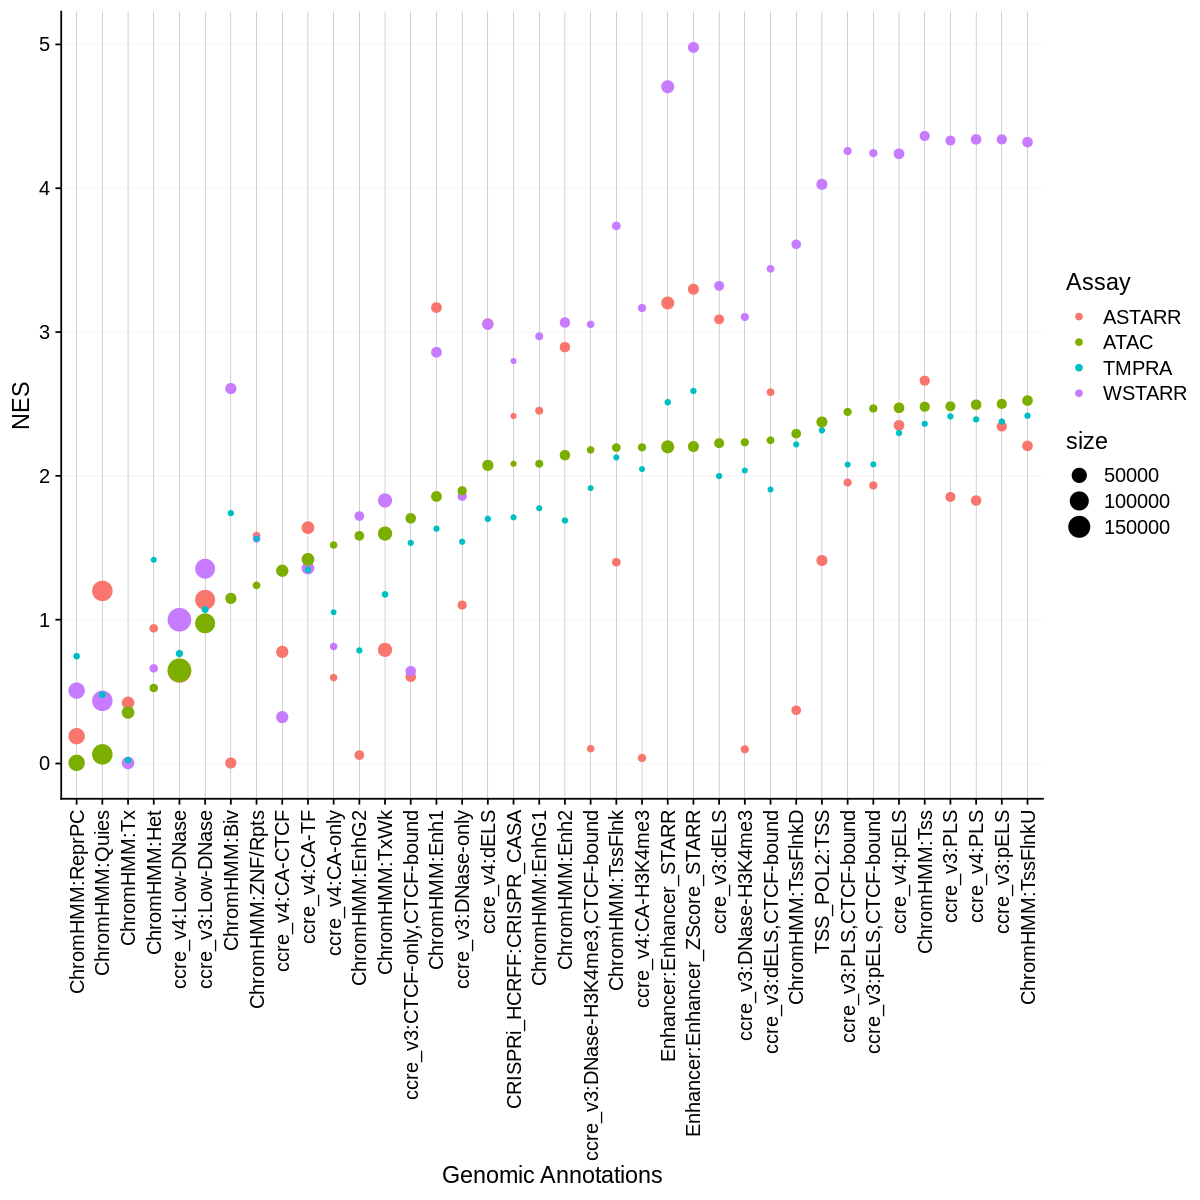

In [10]:
dat = dat_enrich_split
vec = dat %>% 
    dplyr::filter(Assay=="ATAC") %>%
    dplyr::arrange(NES) %>%
    dplyr::pull(Pathway)

dat = dat %>%
    dplyr::mutate(Pathway = factor(Pathway, levels=vec))

gpt = ggplot(dat, aes(x=Pathway, y=NES, size=size, color=Assay, group=Assay)) +
     #geom_line(size=1) +
     geom_point() +
     labs(x="Genomic Annotations") +
     theme_cowplot() +
     theme(
         panel.grid.major.x = element_line(color = "grey50", size = 0.1, linetype = 1),
         panel.grid.major.y = element_line(color = "grey90", size = 0.1, linetype = 1)
     ) +
     theme(axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


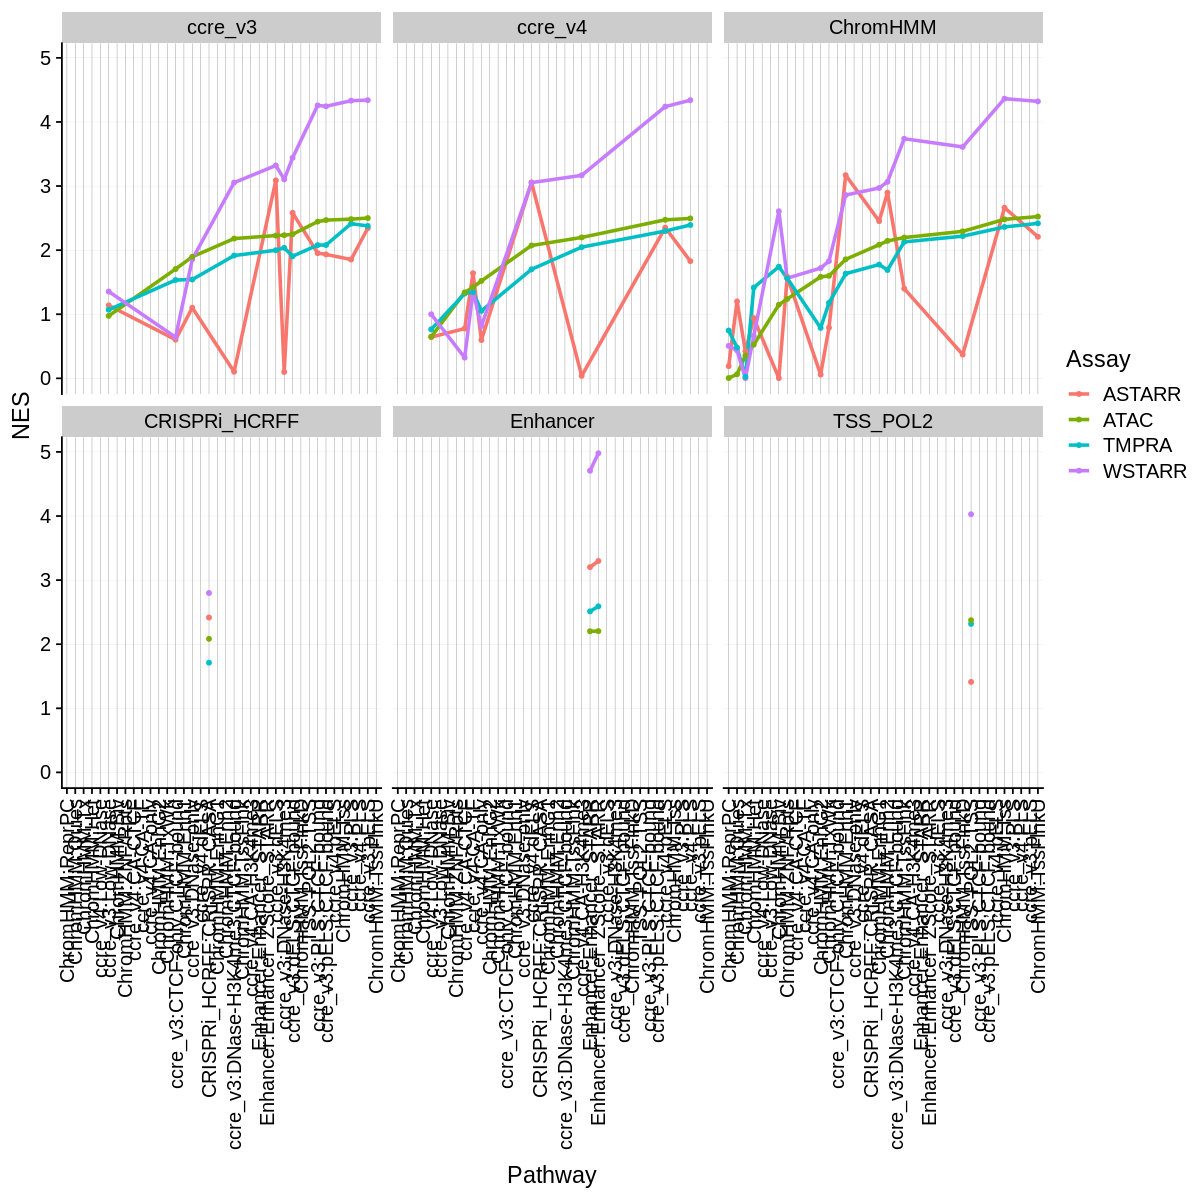

In [49]:
dat = dat_enrich_split
vec = dat %>% 
    dplyr::filter(Assay=="ATAC") %>%
    dplyr::arrange(NES) %>%
    dplyr::pull(Pathway)

dat = dat %>%
    dplyr::mutate(Pathway = factor(Pathway, levels=vec))

gpt = ggplot(dat, aes(x=Pathway, y=NES, size=size, color=Assay, group=Assay)) +
     geom_line(size=1) +
     geom_point(size=1) +
     theme_cowplot() +
     theme(
         panel.grid.major.x = element_line(color = "grey50", size = 0.1, linetype = 1),
         panel.grid.major.y = element_line(color = "grey90", size = 0.1, linetype = 1)
     ) +
     theme(axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5)) +
     facet_wrap(~Annotation)

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

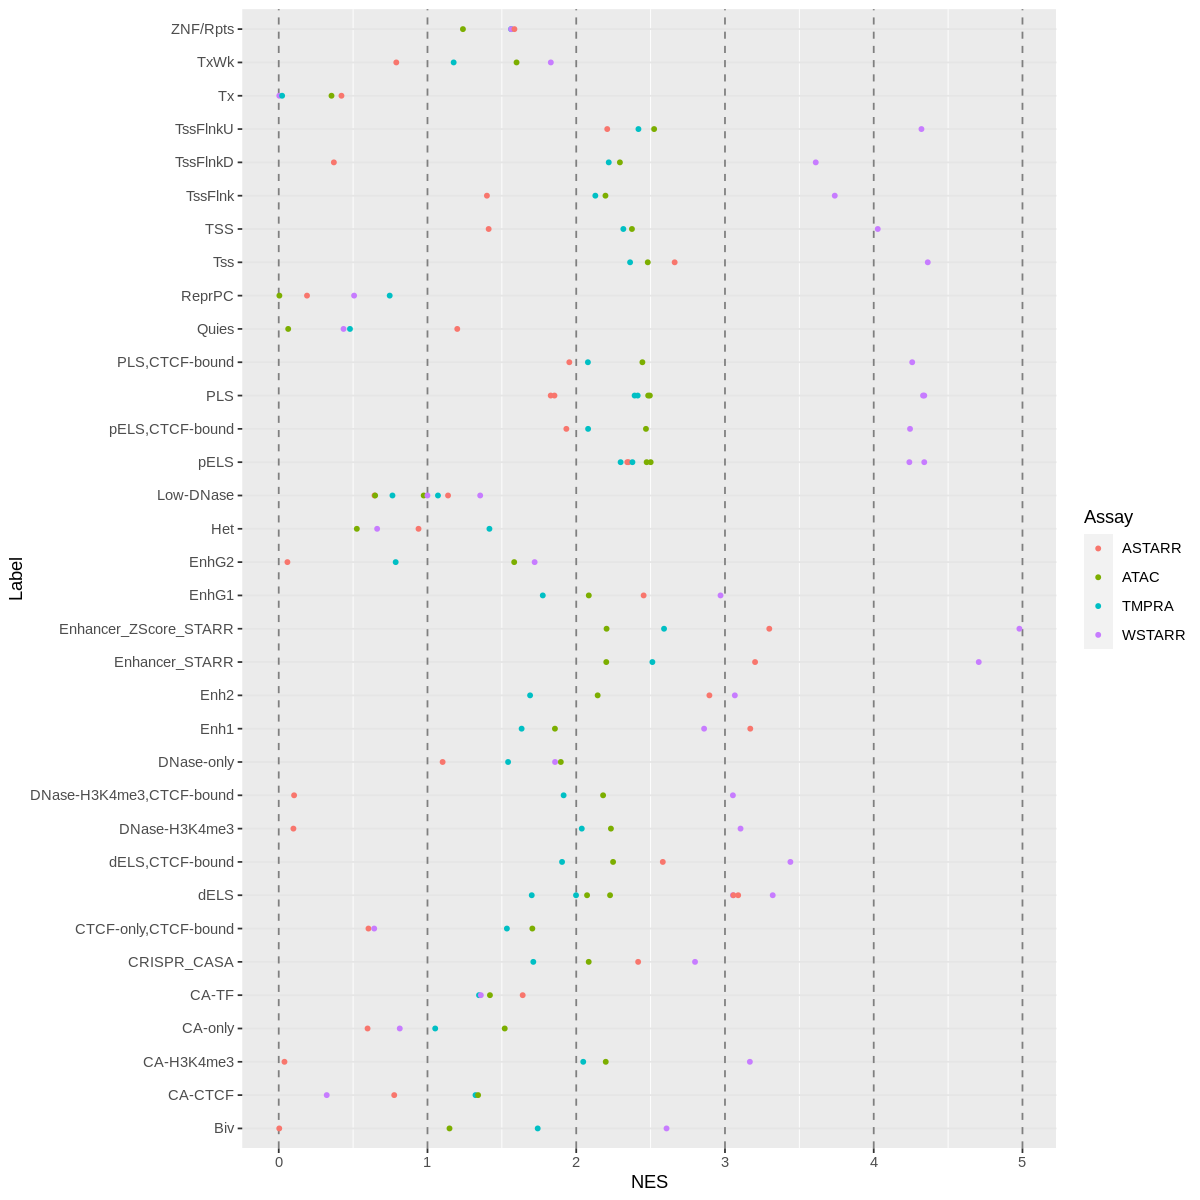

In [35]:
dat = dat_enrich_split
dat = dat %>% 
    dplyr::arrange(NES) %>%
    dplyr::mutate(Pathway = factor(Label, levels=unique(Pathway)))

gpt = ggplot(dat, aes(x=NES, y=Label, size=size, color=Assay, group=Assay)) +
     geom_point(size=1) +
     scale_size(range=c(2,10)) +
     theme(
         panel.grid.major.x = element_line(color = "grey50", size = 0.5, linetype = 2),
         panel.grid.major.y = element_line(color = "grey90", size = 0.5, linetype = 1)
     ) 

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

In [6]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "enrichment_results_split")
fname  = "score_split_astarr_*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)

lst = lapply(fpaths, function(fpath){
    dat = readRDS(fpath)
    return(dat)
})

dat = bind_rows(lst)

dat_enrich_other = dat
print(dim(dat))

[1] 38  8


In [7]:
fdiry  = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "enrichment_results_merge_chipseq_tf")
fname  = "score_merge_overall_*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)

lst = lapply(fpaths, function(fpath){
    dat = readRDS(fpath)
    return(dat)
})

dat = bind_rows(lst)

dat_enrich_chipseq_tf = dat
print(dim(dat))

[1] 713   8


In [7]:
#dat = bind_rows(dat_enrich_other, dat_enrich_chipseq_tf)
dat = dat_enrich_other
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    tidyr::separate(col=pathway, into=c("Annotation", "Label"), sep=":") %>%
    dplyr::mutate(padj  = p.adjust(pval, "BH")) %>%
    dplyr::mutate(nLogP = -log10(padj))

dat_enrich_total = dat
print(dim(dat))
head(dat)

[1] 38  9


,Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,ccre_v3,"CTCF-only,CTCF-bound",1.000000e+00,1.000000e+00,0.0000000,0.12542065,0.60323388,12088,0.000000
2,ccre_v3,"dELS,CTCF-bound",3.967210e-140,1.005026e-139,3.0997561,0.54289723,2.58201463,1994,138.997823
3,ccre_v3,dELS,0.000000e+00,0.000000e+00,Inf,0.64235574,3.08865815,9237,Inf
4,ccre_v3,"DNase-H3K4me3,CTCF-bound",1.000000e+00,1.000000e+00,0.0000000,0.02181507,0.10322475,1533,0.000000
5,ccre_v3,DNase-H3K4me3,1.000000e+00,1.000000e+00,0.0000000,0.02068862,0.09870769,2896,0.000000
6,ccre_v3,DNase-only,7.473341e-03,1.183279e-02,0.4070179,0.22958023,1.10175968,6325,1.926913


## Save results

In [9]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "summary")
fname = "results.enrich.merge.overall.tsv"
fpath = file.path(fdiry, fname)

dat = dat_enrich_total
write_tsv(dat, fpath)